<a href="https://colab.research.google.com/github/MSPCode/Coursera_Capstone/blob/master/Covid_19_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>In the context of the recent global **COVID-19** pandemic, this project will review and analyze the disease progression in the United >States. **The John Hopkins University** and **New York Times** provides daily corona virus cases report in csv format. This project will >use both data sources to identify the trend and provide visulization that help understand future predictions

# Intorduction to COVID-19
<hr>

![COVID-19](https://techcrunch.com/wp-content/uploads/2020/02/coronavirus.jpg)

*Image Credits : [Scientific Animations](http://www.scientificanimations.com/wiki-images/) under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) license*
> **Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br>
**SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on date 27 March 2020), this leads to a total of 24K+ Deaths across the globe, including *16K+ deaths* alone in *Europe*.<br>
Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the world. 

<br><hr>

### This project will use multiple python libraries. **Pandas** and **NumPy** will be used for data analysis. Whereas **matplotlib, plotly, folium,** and **seaborn** will be used for visualization.  

In [0]:
#!pip install plotly==4.6.0


In [0]:
#!pip install folium

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
#pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

from urllib.request import urlopen
import json

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

John Hopkins University provides the following data that is captured in **dataframe(s)** using pandas; data can be used for educational and learning purposes without any approval. However, any use in a commercial product(s) must have prior permission from the author before usage.


In [0]:
import datetime, calendar
year = 2020
month = 3
num_days = calendar.monthrange(year, month)[1]
days = [datetime.date(year, month, day) for day in range(10, num_days+1)]

In [0]:
formatted_dates = []

for date in days:
    day = '{:02d}'.format(date.day)
    month='{:02d}'.format(date.month)
    year = date.year
    full_date = f'{month}-{day}-{year}'
    formatted_dates.append(full_date)

In [0]:
d = {}
for date in formatted_dates:
    data=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date}.csv'
    d['dt_' + str(date)] = pd.read_csv(data)

In [0]:
columns1 = d['dt_03-21-2020'].columns

In [0]:
columns2 = d['dt_03-22-2020'].columns

In [0]:
bigdata1 = pd.DataFrame(columns=columns1)

In [0]:
bigdata2 = pd.DataFrame(columns=columns2)

In [0]:
formatted_dates1 = formatted_dates[:11]

In [0]:
formatted_dates2 = formatted_dates[11:]

In [0]:
for date in formatted_dates1:
    bigdata1 = bigdata1.append(d['dt_' + str(date)], ignore_index=True, sort=True)

In [0]:
for date in formatted_dates2:
    bigdata2 = bigdata2.append(d['dt_' + str(date)], ignore_index=True, sort=True)

In [0]:
new_columns={'Province/State': 'Province_State', 'Country/Region': 'Country_Region', 'Last Update': 'Last_Update','Latitude': 'Lat', 'Longitude': 'Long_'}

In [0]:
bigdata1.rename(columns=new_columns, inplace=True)

In [0]:
bigdata2 = bigdata2[['Confirmed', 'Country_Region', 'Deaths', 'Last_Update', 'Province_State', 'Recovered']]

In [0]:
# Combine both dataframes
master_cloumns= bigdata2.columns

#Master dataframe
bigdata = pd.DataFrame(columns=master_cloumns)

In [0]:
bigdata = bigdata1.append(bigdata2, ignore_index=True, sort=True)

In [0]:
bigdata['Last_Update'] = pd.to_datetime(bigdata['Last_Update']).dt.strftime('%m/%d/%Y')

In [0]:
bigdata_US = bigdata.copy()[bigdata['Country_Region'] == 'US']

In [145]:
bigdata_US[bigdata_US['Province_State'].str.contains("Unassigned")]

Empty DataFrame
Columns: [Confirmed, Country_Region, Deaths, Last_Update, Lat, Long_, Province_State, Recovered]
Index: []

In [146]:
print(f'Total length of data rows: {len(bigdata_US)}')
print(f'Total Confirmed Cases: {int(bigdata_US.Confirmed.sum())}')
print(f'Total Dethts Cases: {int(bigdata_US.Deaths.sum())}')

Total length of data rows: 31396
Total Confirmed Cases: 1058694
Total Dethts Cases: 17784


In [147]:
print("Size/Shape of the dataset: ",bigdata_US.shape)
print("Checking for null values:\n",bigdata_US.isnull().sum())
print("Checking Data-type of each column:\n",bigdata_US.dtypes)

Size/Shape of the dataset:  (31396, 8)
Checking for null values:
 Confirmed             0
Country_Region        0
Deaths                0
Last_Update           0
Lat               30792
Long_             30792
Province_State        0
Recovered             0
dtype: int64
Checking Data-type of each column:
 Confirmed          object
Country_Region     object
Deaths             object
Last_Update        object
Lat               float64
Long_             float64
Province_State     object
Recovered          object
dtype: object


### Latitude and Longitude data has too many missing values, we will drop both columns for time being and re-review this data when we start geospatial analysis.

In [0]:
bigdata_US.rename(columns={'Last_Update': 'Date'}, inplace=True)

In [0]:
#Converting "Date" column into Datetime format
bigdata_US["Date"]=pd.to_datetime(bigdata_US["Date"])

In [0]:
#Grouping different types of cases as per the date
datewise=bigdata_US.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [151]:
bigdata_US.head()

Confirmed Country_Region Deaths  ...       Long_    Province_State  Recovered
30       267             US     23  ... -121.490500        Washington          1
36       173             US      0  ...  -74.948100          New York          0
40       144             US      2  ... -119.681600        California          2
49        92             US      0  ...  -71.530100     Massachusetts          1
65        46             US      0  ...  139.638000  Diamond Princess          0

[5 rows x 8 columns]

In [152]:
datewise.head()

Confirmed  Recovered  Deaths
Date                                    
2020-03-10       1247          8      28
2020-03-11       3425         21      84
2020-03-12       1557         11      39
2020-03-13         33          0       0
2020-03-14       3170         14      57

In [153]:
datewise.tail()

Confirmed  Recovered  Deaths
Date                                    
2020-03-27     101657        869    1581
2020-03-28     121478       1072    2026
2020-03-29     140886       2665    2467
2020-03-30     161807       5644    2978
2020-03-31     188172       7024    3873

In [154]:
print("Basic Information")
print("Total number of States with Disease Spread: ",len(bigdata_US["Province_State"].unique()))
print("Total number of Confirmed Cases in US: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases in US: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around in US: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around in US: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around in US: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day in US: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day in US: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day in US: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour in US: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour in US: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour in US: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))

Basic Information
Total number of States with Disease Spread:  63
Total number of Confirmed Cases in US:  188172
Total number of Recovered Cases in US:  7024
Total number of Deaths Cases around in US:  3873
Total number of Active Cases around in US:  177275
Total number of Closed Cases around in US:  10897
Approximate number of Confirmed Cases per Day in US:  8961.0
Approximate number of Recovered Cases per Day in US:  334.0
Approximate number of Death Cases per Day in US:  184.0
Approximate number of Confirmed Cases per hour in US:  373.0
Approximate number of Recovered Cases per hour in US:  14.0
Approximate number of Death Cases per hour in US:  8.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

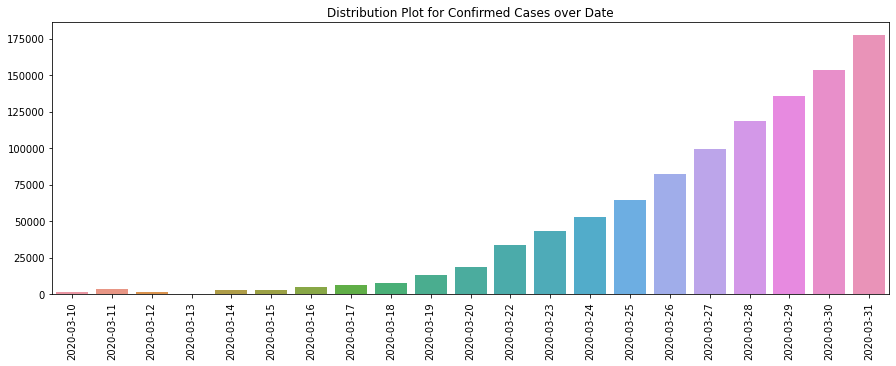

In [155]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution Plot for Confirmed Cases over Date")
plt.xticks(rotation=90)

In [0]:
datewise_exp = datewise.reset_index().copy()

In [157]:
fig = px.line(datewise_exp, 
              x='Date', 
              y='Confirmed',
              title='Number of Confirmed Cases')
fig.show()

#### Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
#### Increase in number of Active Cases is is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same in the notebook ahead.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

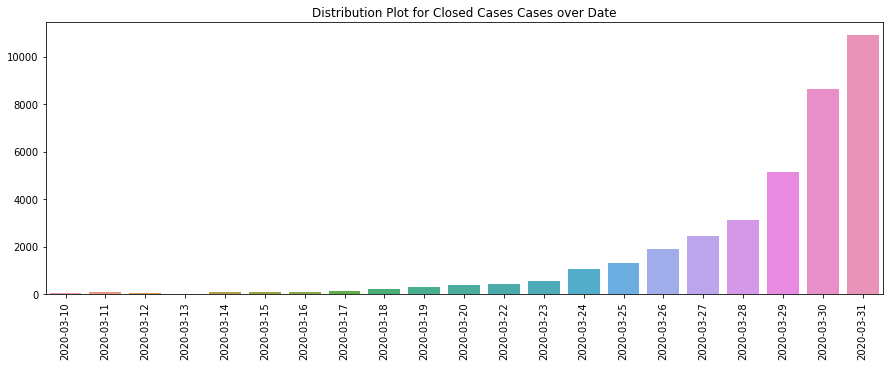

In [158]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution Plot for Closed Cases Cases over Date")
plt.xticks(rotation=90)

#### Closed Cases = Number of Recovered Cases + Number of Death Cases 
#### Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19

<function matplotlib.pyplot.xlabel>

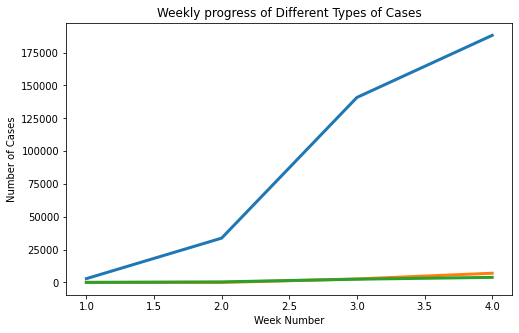

In [159]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.xlabel

Text(0.5, 1.0, 'Weekly Increase in Number of Death Cases')

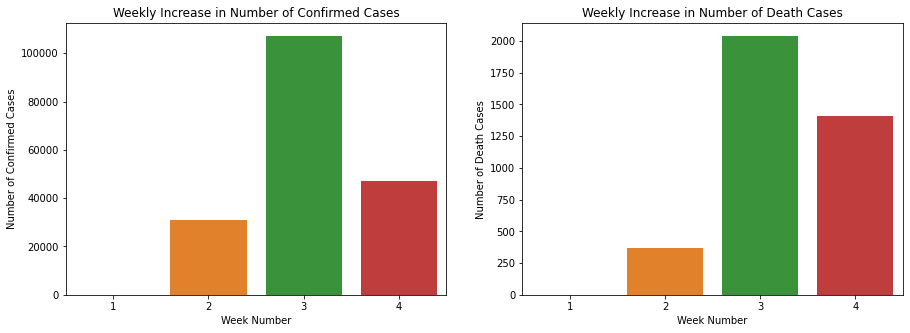

In [160]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly Increase in Number of Confirmed Cases")
ax2.set_title("Weekly Increase in Number of Death Cases")

In [0]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

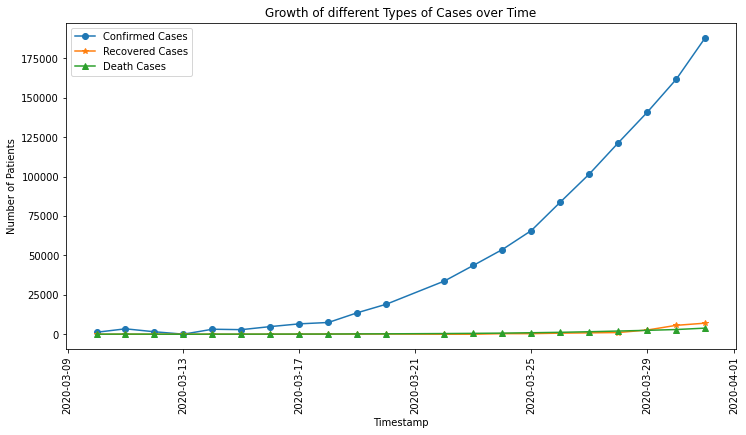

In [162]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

In [163]:
datewise.head()

Confirmed  Recovered  Deaths  WeekOfYear
Date                                                
2020-03-10       1247          8      28          11
2020-03-11       3425         21      84          11
2020-03-12       1557         11      39          11
2020-03-13         33          0       0          11
2020-03-14       3170         14      57          11

Average Mortality Rate 1.6379006535179035
Median Mortality Rate 1.6677916989084445
Average Recovery Rate 0.9142291434073323
Median Recovery Rate 0.64756233717901


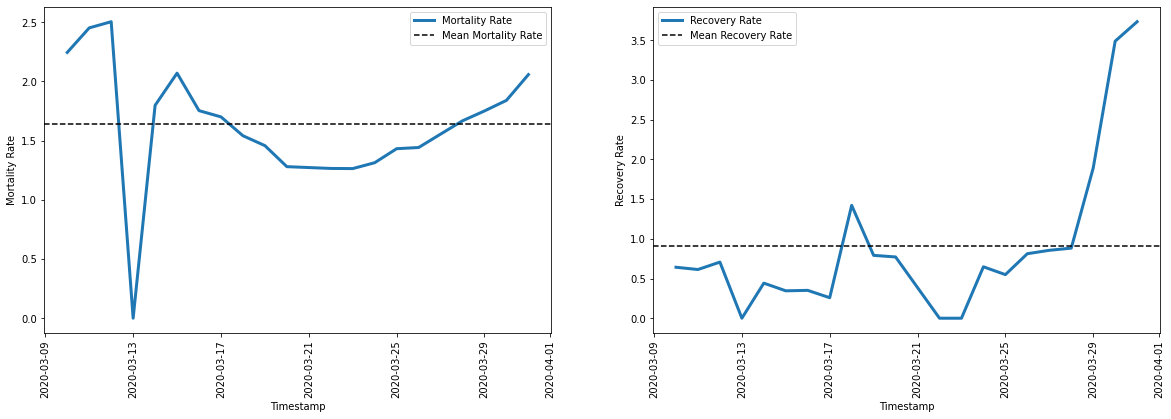

In [164]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

#Plotting Mortality and Recoverdatewise_marchy Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate',linewidth=3)
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate",linewidth=3)
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#### Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#### Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
#### Mortality rate increment is pretty significant along with drastic drop in recovery rate falling even below the average Recovery Rate around the US. That's a conclusive evidence why number of Active Cases are rising, also there is increase in number of Closed Cases as the mortality rate is a clear indication of increase number of Death Cases

Average increase in number of Confirmed Cases every day:  8901.0
Average increase in number of Recovered Cases every day:  334.0
Average increase in number of Deaths Cases every day:  183.0


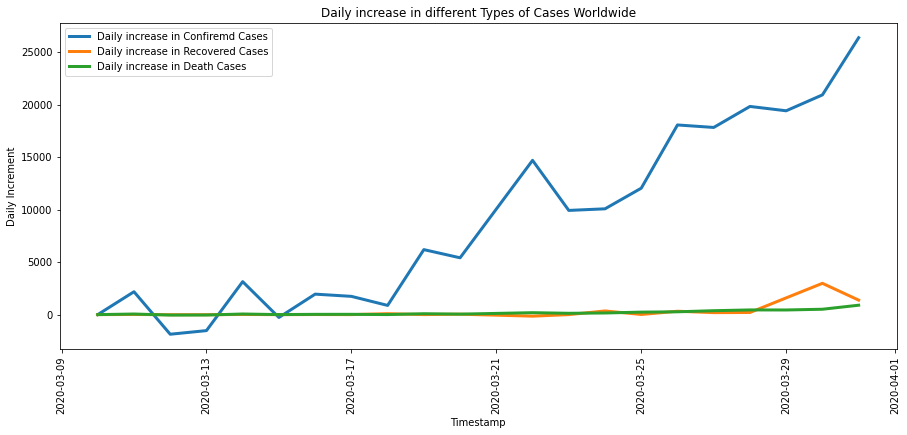

In [165]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase in different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

### Growth Factor
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases**.

A growth factor **above 1 but trending downward** is a positive sign, whereas a **growth factor constantly above 1 is the sign of exponential growth**.

A growth factor **constant at 1 indicates there is no change in any kind of cases**.

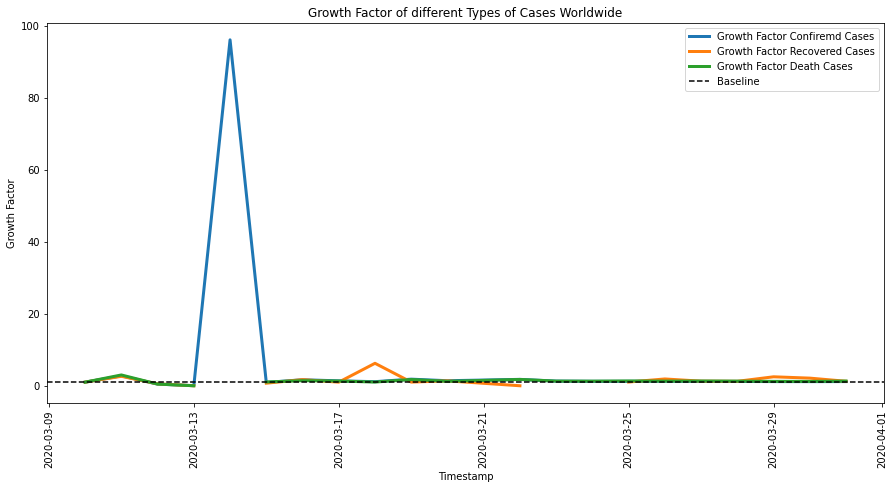

In [166]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()

In [0]:
#Calculating countrywise Moratality and Recovery Rate
statewise=bigdata_US[bigdata_US["Date"]==bigdata_US["Date"].max()].groupby(["Province_State"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
statewise["Mortality"]=(statewise["Deaths"]/statewise["Confirmed"])*100
statewise["Recovery"]=(statewise["Recovered"]/statewise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 state as per Number of Death Cases')

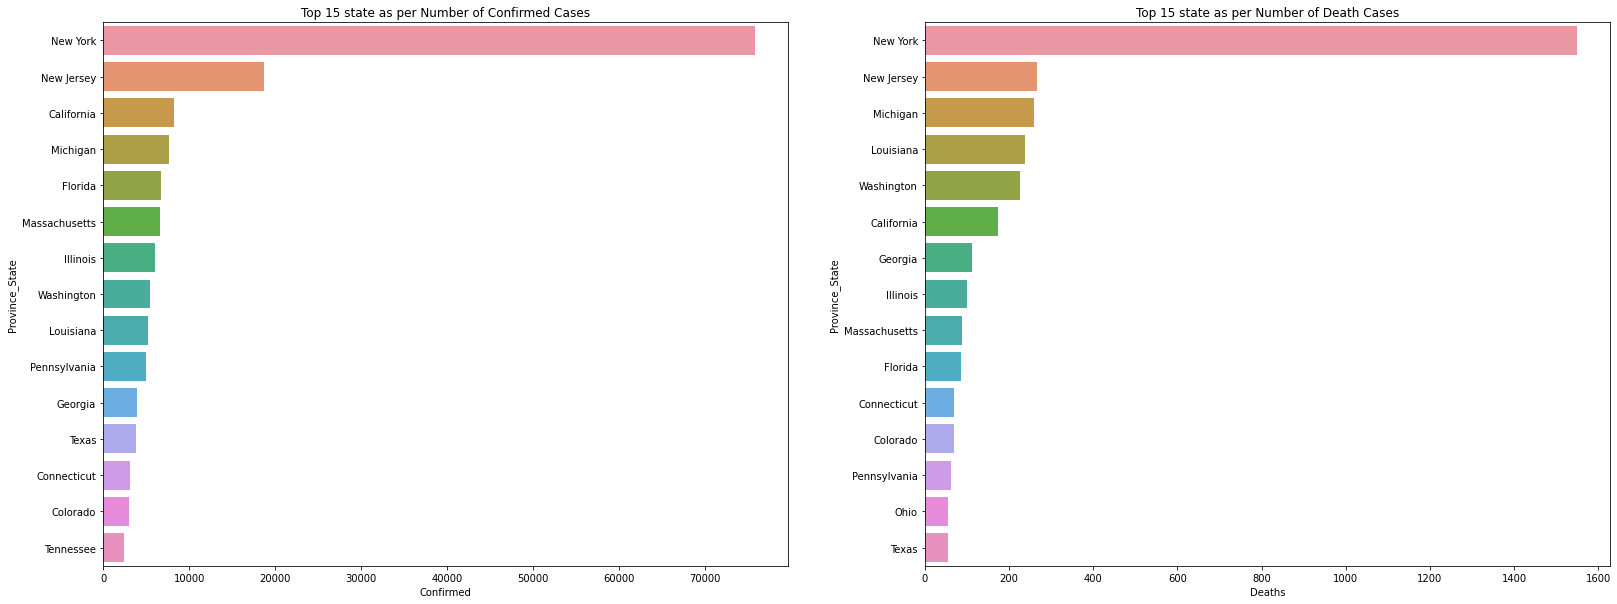

In [168]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
top_15_confirmed=statewise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=statewise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 state as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 state as per Number of Death Cases")

#### Top 15 states as per Mortatlity Rate and Recovery Rate with more than 100 Confirmed Cases

Text(0.5, 0, 'Mortality (in Percentage)')

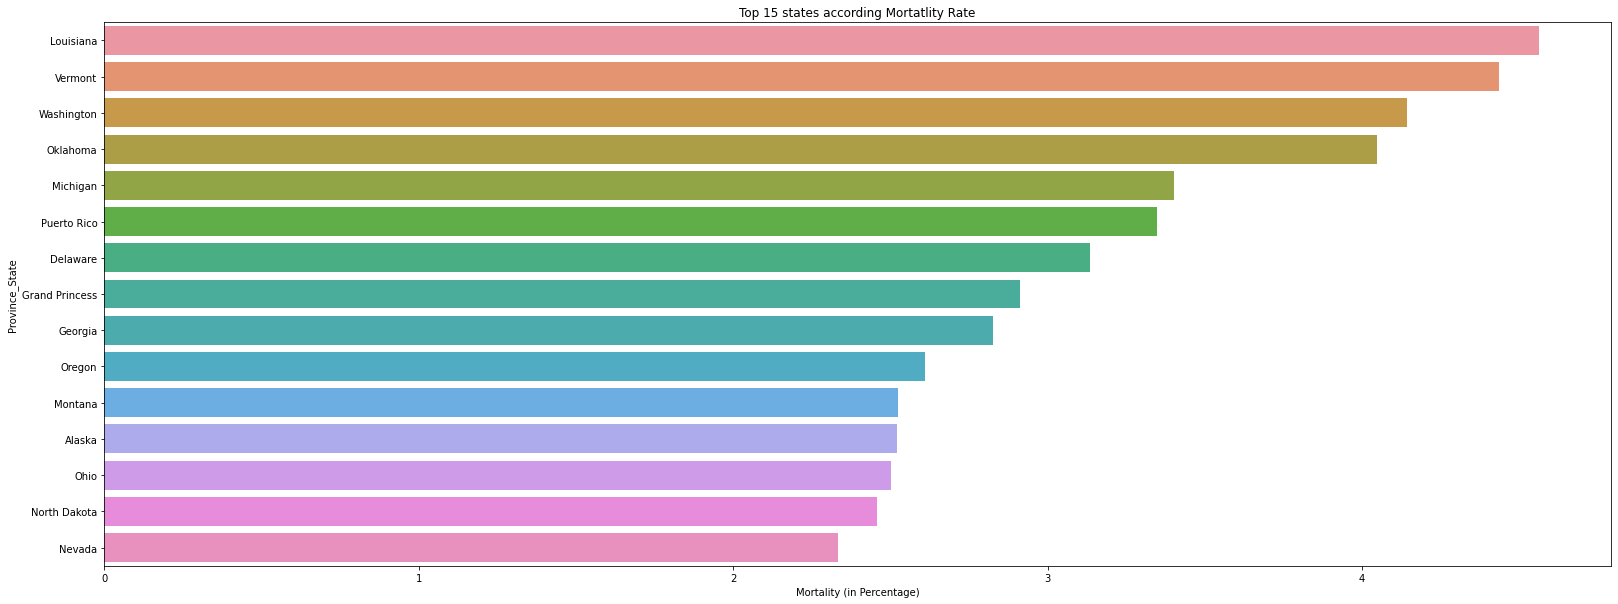

In [169]:
fig, ax1 = plt.subplots(1, 1,figsize=(27,10))
statewise_plot_mortal=statewise[statewise["Confirmed"]>100].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=statewise_plot_mortal["Mortality"],y=statewise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 states according Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")

#### States with more than 5000 Confirmed and Cases with No Recovered Patients with considerable Mortality Rate

In [170]:
no_recovered_states=statewise[(statewise["Confirmed"]>5000)&(statewise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_states["Mortality Rate"]=(no_recovered_states["Deaths"]/no_recovered_states["Confirmed"])*100
no_recovered_states[no_recovered_states["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)

Confirmed  Deaths  Mortality Rate
Province_State                                   
Louisiana            5237     239        4.563681
Washington           5432     225        4.142121
Michigan             7615     259        3.401182
California           8210     173        2.107186
New York            75833    1550        2.043965
Illinois             5994      99        1.651652
New Jersey          18696     267        1.428113
Massachusetts        6620      89        1.344411
Florida              6741      85        1.260941

Text(0.5, 1.0, 'Top 15 States with Most Number of Closed Cases')

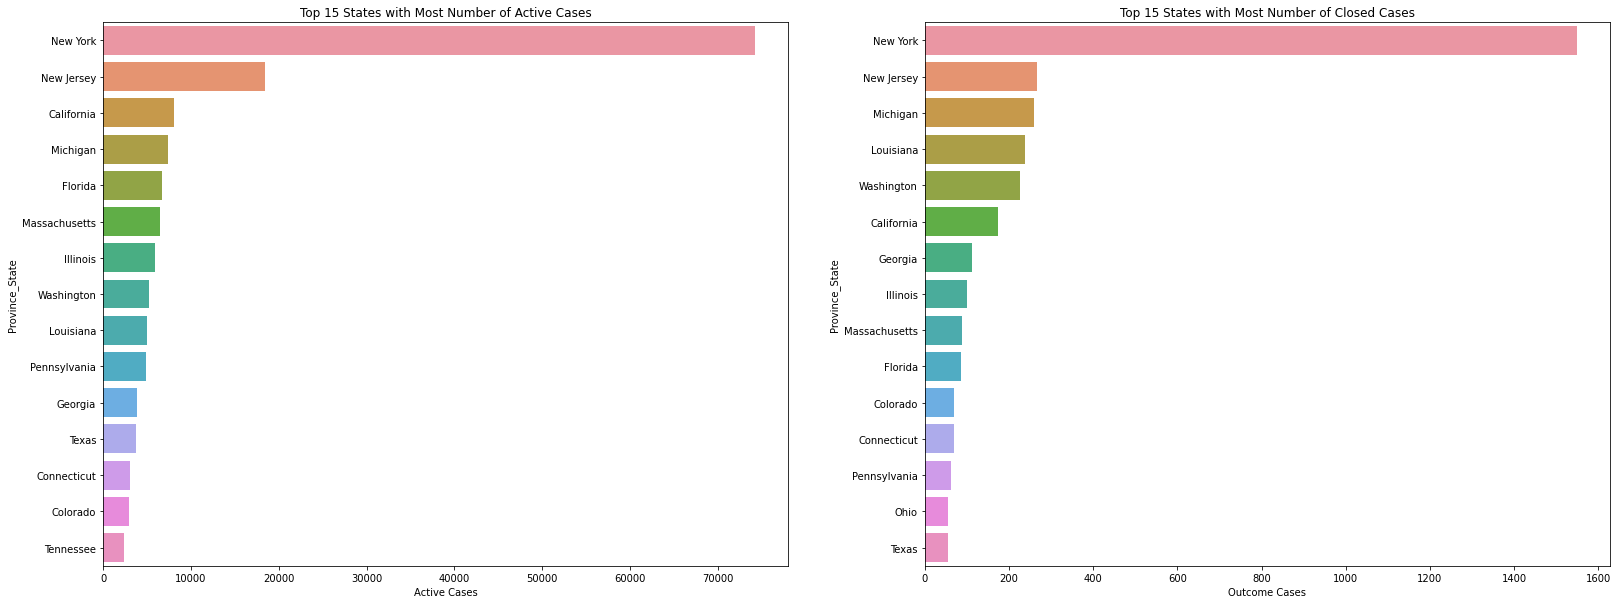

In [171]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
statewise["Active Cases"]=(statewise["Confirmed"]-statewise["Recovered"]-statewise["Deaths"])
statewise["Outcome Cases"]=(statewise["Recovered"]+statewise["Deaths"])
statewise.drop(index='Recovered', inplace=True)
top_10_active=statewise.sort_values(["Active Cases"],ascending=False).head(15)
top_10_outcome=statewise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_10_active["Active Cases"],y=top_10_active.index,ax=ax1)
sns.barplot(x=top_10_outcome["Outcome Cases"],y=top_10_outcome.index,ax=ax2)
ax1.set_title("Top 15 States with Most Number of Active Cases")
ax2.set_title("Top 15 States with Most Number of Closed Cases")

In [0]:
state_date=bigdata_US.groupby(["Province_State","Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for state in statewise.index:
    days=state_date.loc[state].shape[0]
    confirm_rate.append((statewise.loc[state]["Confirmed"])/days)
statewise["Confirm Cases/Day"]=confirm_rate

Text(0.5, 1.0, 'Top 15 states as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases')

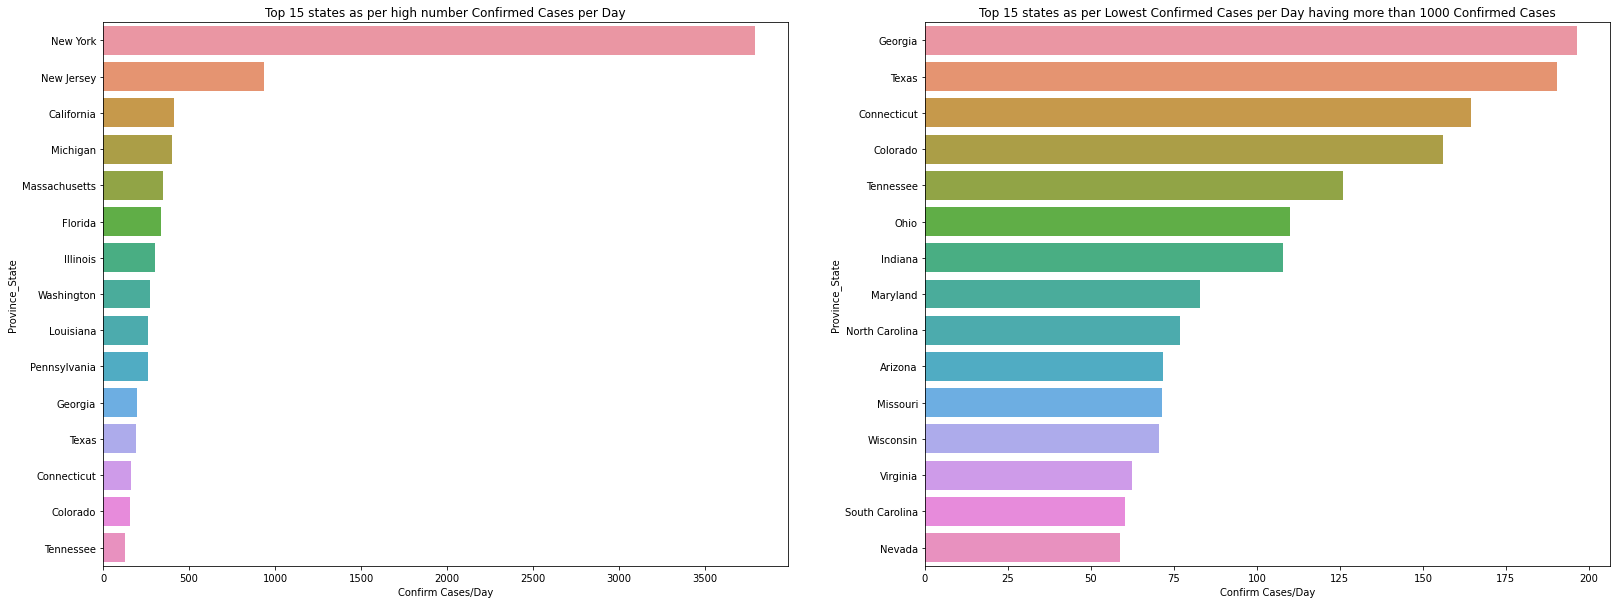

In [173]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
top_15_ccpd=statewise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 states as per high number Confirmed Cases per Day")
bottom_15_ccpd=statewise[statewise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("Top 15 states as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")

Mean Survival Probability across all States 98.11397400457422
Median Survival Probability across all States 98.18181818181819
Mean Death Probability across all States 1.8860259954257828
Median Death Probability across all States 1.818181818181813


Text(0.5, 1.0, 'Bottom 15 States as per Survival Probability')

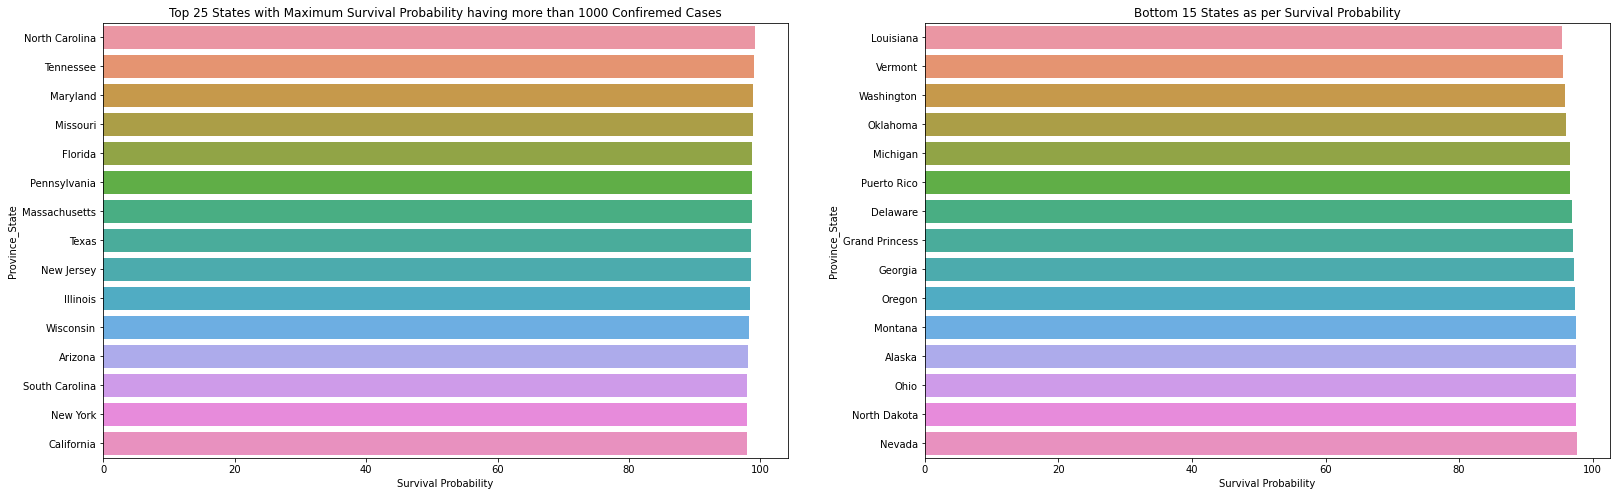

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,8))
statewise["Survival Probability"]=(1-(statewise["Deaths"]/statewise["Confirmed"]))*100
top_25_survival=statewise[statewise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 States with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all States',statewise["Survival Probability"].mean())
print('Median Survival Probability across all States',statewise["Survival Probability"].median())
print('Mean Death Probability across all States',100-statewise["Survival Probability"].mean())
print('Median Death Probability across all States',100-statewise["Survival Probability"].median())

Bottom_5_states=statewise[statewise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_states["Survival Probability"],y=Bottom_5_states.index,ax=ax2)
plt.title("Bottom 15 States as per Survival Probability")

#### Survival Probability is the only graph that looks the most promising! Having average survival probability of 98%+ across all states.

### Comparison of New York, New Jersey, Michigan, California, Louisiana and Rest of the States

In [175]:
bigdata_US.head()

Confirmed Country_Region Deaths  ...       Long_    Province_State  Recovered
30       267             US     23  ... -121.490500        Washington          1
36       173             US      0  ...  -74.948100          New York          0
40       144             US      2  ... -119.681600        California          2
49        92             US      0  ...  -71.530100     Massachusetts          1
65        46             US      0  ...  139.638000  Diamond Princess          0

[5 rows x 8 columns]

In [0]:
Newyork_data=bigdata_US[bigdata_US["Province_State"]=="New York"]
Newjersey_data=bigdata_US[bigdata_US["Province_State"]=="New Jersey"]
Michigan_data=bigdata_US[bigdata_US["Province_State"]=="Michigan"]
California_data=bigdata_US[bigdata_US["Province_State"]=="California"]
Louisiana_data=bigdata_US[bigdata_US["Province_State"]=="Louisiana"]

rest_of_states=bigdata_US[(bigdata_US["Province_State"]!="New York")&(bigdata_US["Province_State"]!="New Jersey")&(bigdata_US["Province_State"]!="Michigan")&(bigdata_US["Province_State"]!="California")&(bigdata_US["Province_State"]!="Louisiana")]

datewise_newyork=Newyork_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_newjersey=Newjersey_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_michigan=Michigan_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_california=California_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_louisiana=Louisiana_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofstates=rest_of_states.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

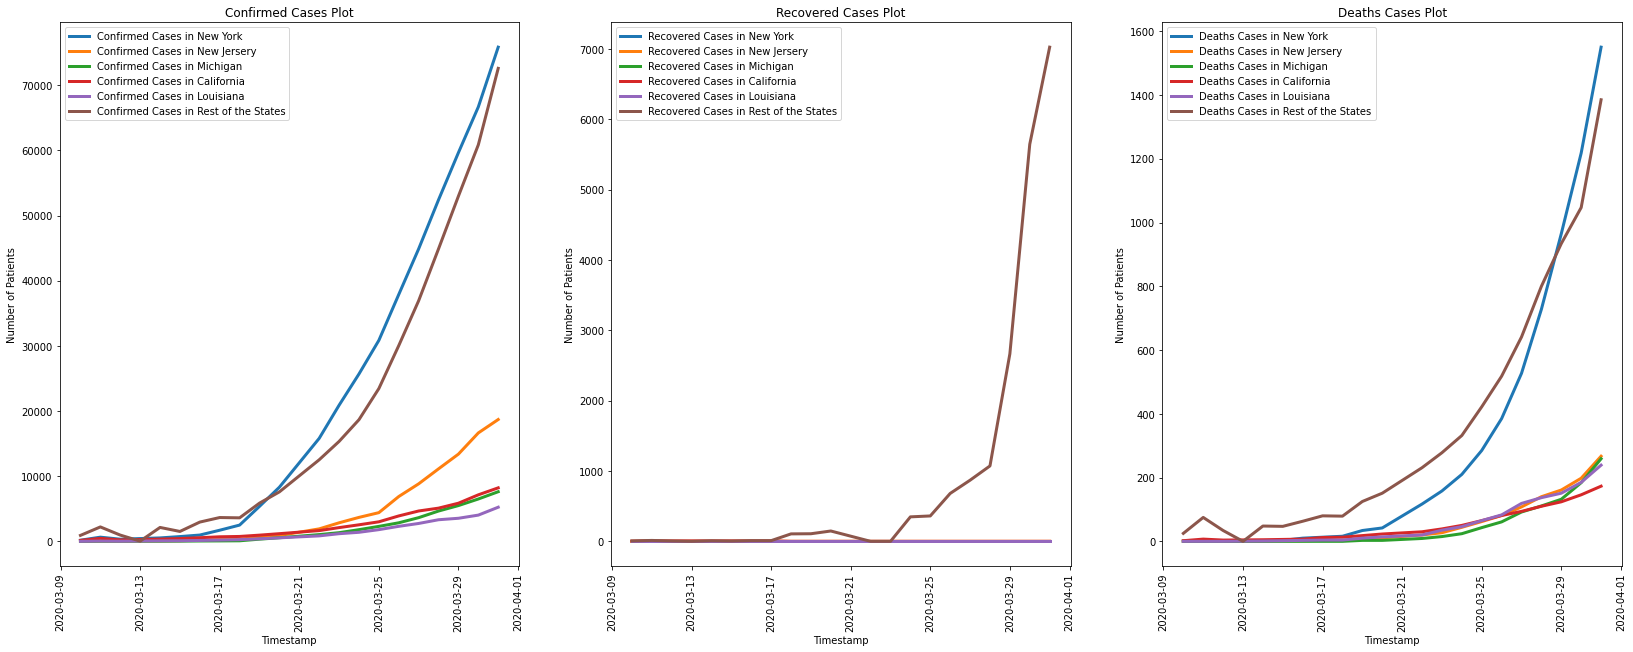

In [177]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(28,10))
ax1.plot(datewise_newyork["Confirmed"],label="Confirmed Cases in New York",linewidth=3)
ax1.plot(datewise_newjersey["Confirmed"],label="Confirmed Cases in New Jersery",linewidth=3)
ax1.plot(datewise_michigan["Confirmed"],label="Confirmed Cases in Michigan",linewidth=3)
ax1.plot(datewise_california["Confirmed"],label="Confirmed Cases in California",linewidth=3)
ax1.plot(datewise_louisiana["Confirmed"],label="Confirmed Cases in Louisiana",linewidth=3)
ax1.plot(datewise_restofstates["Confirmed"],label="Confirmed Cases in Rest of the States",linewidth=3)
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

ax2.plot(datewise_newyork["Recovered"],label="Recovered Cases in New York",linewidth=3)
ax2.plot(datewise_newjersey["Recovered"],label="Recovered Cases in New Jersery",linewidth=3)
ax2.plot(datewise_michigan["Recovered"],label="Recovered Cases in Michigan",linewidth=3)
ax2.plot(datewise_california["Recovered"],label="Recovered Cases in California",linewidth=3)
ax2.plot(datewise_louisiana["Recovered"],label="Recovered Cases in Louisiana",linewidth=3)
ax2.plot(datewise_restofstates["Recovered"],label="Recovered Cases in Rest of the States",linewidth=3)
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
    
ax3.plot(datewise_newyork["Deaths"],label="Deaths Cases in New York",linewidth=3)
ax3.plot(datewise_newjersey["Deaths"],label="Deaths Cases in New Jersery",linewidth=3)
ax3.plot(datewise_michigan["Deaths"],label="Deaths Cases in Michigan",linewidth=3)
ax3.plot(datewise_california["Deaths"],label="Deaths Cases in California",linewidth=3)
ax3.plot(datewise_louisiana["Deaths"],label="Deaths Cases in Louisiana",linewidth=3)
ax3.plot(datewise_restofstates["Deaths"],label="Deaths Cases in Rest of the States",linewidth=3)
ax3.set_title("Deaths Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)

# Perform Geospatial analysis for visulization

In [0]:
import pytz
import datetime
today = datetime.datetime.now(pytz.timezone('US/Pacific'))
yest = today - datetime.timedelta(days=1)
dbyest = today - datetime.timedelta(days=2)
dates = [today,yest,dbyest]

def getFile(dates, default=None):
    
    for date in dates:
        try:
            file_link = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/0{date.month}-{date.day}-{date.year}.csv'
            df_activity = pd.read_csv(file_link)
            return df_activity
        except:
            continue
    else:
        file_link = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv'
        df_activity = df_activity = pd.read_csv(file_link)
        return df_activity
    

df_activity = getFile(dates)

In [179]:
df_activity.head(2)

FIPS     Admin2  ... Active                   Combined_Key
0 45001.000000  Abbeville  ...      0  Abbeville, South Carolina, US
1 22001.000000     Acadia  ...      0          Acadia, Louisiana, US

[2 rows x 12 columns]

In [0]:
df_activity.rename(columns={'Admin2': 'County'}, inplace=True)
df_activity = df_activity[df_activity.Country_Region == 'US']


#Chnage last_update column to date format
df_activity['Last_Update'] = pd.to_datetime(df_activity['Last_Update']).dt.strftime('%m/%d/%Y')

In [0]:
confirmed_cases = pd.DataFrame(df_activity.groupby('Province_State')['Confirmed'].sum())
confirmed_cases['Province_State'] = confirmed_cases.index
confirmed_cases.index = np.arange(1,59)

death_cases = pd.DataFrame(df_activity.groupby('Province_State')['Deaths'].sum())
death_cases['Province_State'] = death_cases.index
death_cases.index = np.arange(1,59)

active_cases = pd.DataFrame(df_activity.groupby('Province_State')['Active'].count())
active_cases['Province_State'] = active_cases.index
active_cases.index = np.arange(1,59)

In [0]:
# Fix NA Lat, Long data
df_activity.iat[814,5] = 29.693380
df_activity.iat[814,6] = -95.193329

df_activity.iat[1255,5] = 29.732770
df_activity.iat[1255,6] = -90.635400

df_activity.iat[1289,5] = 32.234820
df_activity.iat[1289,6] = -82.406250

In [183]:
# verify that the null values has been addressed
df_activity[df_activity.Lat.isnull()]

Empty DataFrame
Columns: [FIPS, County, Province_State, Country_Region, Last_Update, Lat, Long_, Confirmed, Deaths, Recovered, Active, Combined_Key]
Index: []

# Following graph shows number of confirmed, death and active cases within all counties of United States

In [184]:
US_map = folium.Map(location=[34, -94], tiles="cartodbpositron", zoom_start=4.4,max_zoom=10,min_zoom=2, height=500, width='100%')

for i in range(0, len(df_activity)):
    
    folium.Circle(location=[df_activity.iloc[i]['Lat'], df_activity.iloc[i]['Long_']],
    
    tooltip="<h5 style='text-align:center;font-weight: bold'>"+str(df_activity.iloc[i]['County'])+"</h5>"+
            "<hr style='margin:10px;'>"+
            "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
            "<li>Confirmed: "+str(df_activity.iloc[i]['Confirmed'])+"</li>"+
            "<li>Deaths:   "+str(df_activity.iloc[i]['Deaths'])+"</li>"+
            "<li>Active:   "+str(df_activity.iloc[i]['Deaths'])+"</li>"+
            "</ul>",
    radius=(int((np.log(df_activity.iloc[i,-5]+1.00001)))+0.2)*5000,
    color='#ff6600',
    fill_color='#ff8533',
    fill=True).add_to(US_map)
US_map

In [185]:
with urlopen ('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    US_geoJSON = json.load(response)

US_geoJSON['features'][0]

{'geometry': {'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]],
  'type': 'Polygon'},
 'id': '01001',
 'properties': {'CENSUSAREA': 594.436,
  'COUNTY': '001',
  'GEO_ID': '0500000US01001',
  'LSAD': 'County',
  'NAME': 'Autauga',
  'STATE': '01'},
 'type': 'Feature'}

In [186]:
df_activity.head(2)

FIPS     County  ... Active                   Combined_Key
0 45001.000000  Abbeville  ...      0  Abbeville, South Carolina, US
1 22001.000000     Acadia  ...      0          Acadia, Louisiana, US

[2 rows x 12 columns]

In [0]:
df_confirmed_cases = pd.DataFrame(df_activity[['FIPS','Confirmed', 'County', 'Province_State']].reset_index())

In [0]:
df_confirmed_cases.rename(columns={'Province_State': 'State'}, inplace=True)

In [189]:
fig = px.choropleth(df_confirmed_cases, geojson=US_geoJSON, locations='FIPS', color='Confirmed',
                           color_continuous_scale="Reds",
                           range_color=(0,10),
                           scope="usa",
                           #labels={'Confirmed':'Confirmed Cases', 'County': 'CountyName'}
                           hover_name = 'County',
                           hover_data = ['State', 'Confirmed'] 
                          )
fig.update_layout(margin={"r":1,"t":0,"l":0,"b":0})
fig.show()

In [0]:
df_state_total = df_activity.groupby('Province_State').sum().reset_index()

In [0]:
# Drop column for diamong princess, grand princess and recovered
df_state_total.drop(index=8, inplace=True)
df_state_total.drop(index=12, inplace=True)
df_state_total.drop(index=44, inplace=True)

In [0]:
df_state_total.reset_index(inplace=True)

In [0]:
#Convert dataframe to string type
for col in df_state_total.columns:
    df_state_total[col] = df_state_total[col].astype(str)

In [0]:
#Create tetxt column
df_state_total['text'] = df_state_total['Province_State']+"<br>"+"Confirmed: "+df_state_total['Confirmed']

In [0]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [0]:
# Add state abrbrevation
df_state_total['state_abbrv'] = df_state_total['Province_State'].apply(lambda x:us_state_abbrev[x])

In [197]:
fig = go.Figure(data=go.Choropleth(
    locations=df_state_total['state_abbrv'], # Spatial coordinates
    z = df_state_total['Confirmed'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    autocolorscale=False,
    text=df_state_total['text'],
    marker_line_color='white',
    colorbar_title = "Thousands",
))

fig.update_layout(
    title_text='Total Confirmed Cases by State <br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa')),
)

fig.show()

## Prediction using Machine Learning Models

#### Linear Regression Model for Confirm Cases Prediction

In [198]:
!pip install numpy --upgrade
!pip install pandas --upgrade

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.2)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [0]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [0]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores=[]

In [0]:
lin_reg=LinearRegression(normalize=True)

In [204]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [206]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  66836.11885535326


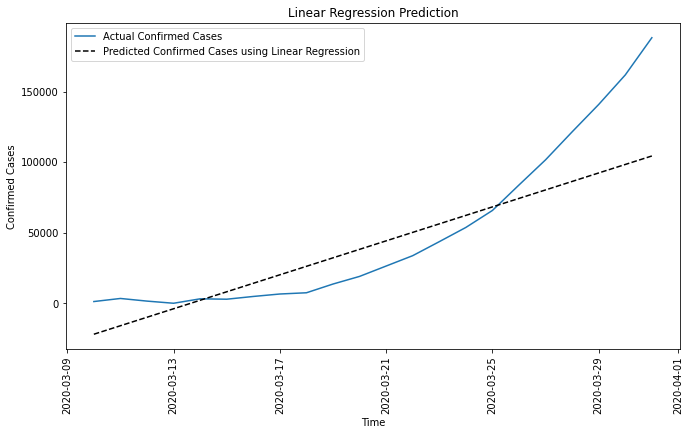

In [207]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

#### Support Vector Machine ModelRegressor for Prediction of Confirmed Cases

In [0]:
#Intializing SVR Model and with hyperparameters for GridSearchCV
svm=SVR(C=1,degree=5.0,kernel='poly',epsilon=0.01)

In [209]:
#Performing GridSearchCV to find the Best Estimator
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5.0, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [211]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  67476.89350364039


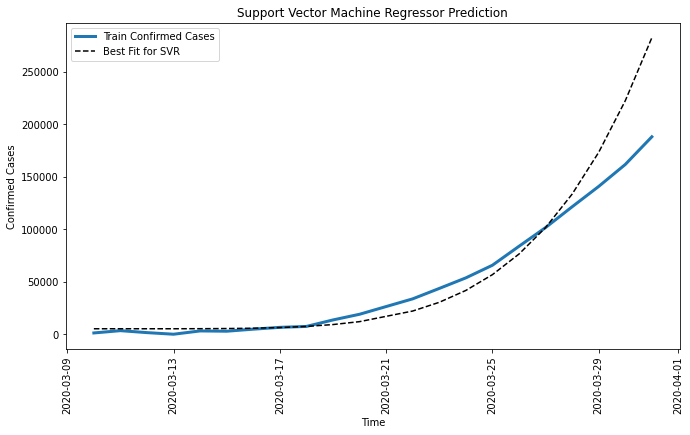

In [212]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

In [0]:
from datetime import timedelta
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [214]:
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","Linear Regression Prediction","SVM Prediction"])
model_predictions.head()

Dates  Linear Regression Prediction  SVM Prediction
0 2020-04-01                 110394.251375   355217.015764
1 2020-04-02                 116408.096819   442325.702293
2 2020-04-03                 122421.942262   545975.186226
3 2020-04-04                 128435.787706   668416.678441
4 2020-04-05                 134449.633150   812096.970130

## Time Series Forecasting 

#### Holt's Linear Model

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid=datewise.iloc[int(datewise.shape[0]*0.90):]

In [0]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.3, smoothing_slope=1.2)
y_pred=valid.copy()

In [217]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  47611.166129967096


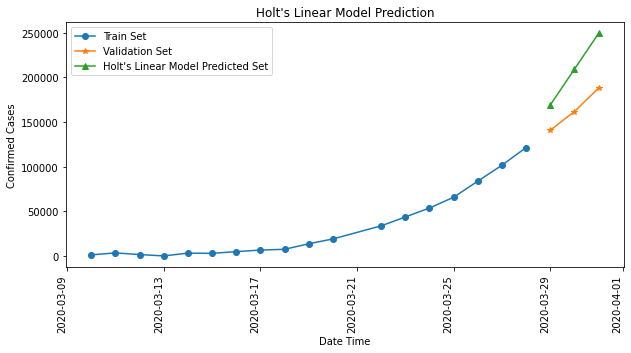

In [218]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Holt's Linear Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [219]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

Dates  ...  Holt's Linear Model Prediction
0 2020-04-01  ...                   289484.194614
1 2020-04-02  ...                   329586.964208
2 2020-04-03  ...                   369689.733801
3 2020-04-04  ...                   409792.503395
4 2020-04-05  ...                   449895.272988

[5 rows x 4 columns]

#### Holt's Winter Model for Daily Time Series

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [0]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=9,trend='mul', seasonal='add').fit()

In [0]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))

In [223]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  4765.531009885353


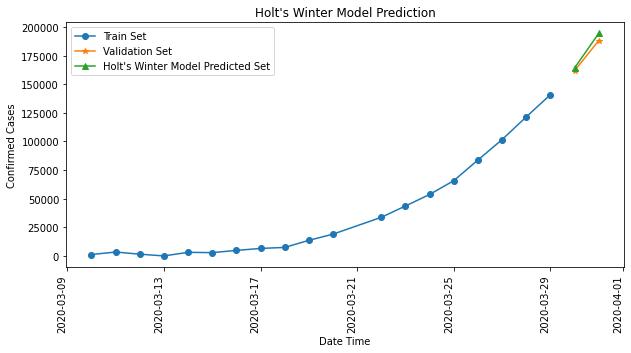

In [224]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred["Holt\'s Winter Model"].plot(label="Holt's Winter Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Holt's Winter Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [225]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

Dates  ...  Holt's Winter Model Prediction
0 2020-04-01  ...                   225522.101733
1 2020-04-02  ...                   263600.415268
2 2020-04-03  ...                   305422.620983
3 2020-04-04  ...                   355662.396723
4 2020-04-05  ...                   410387.284698

[5 rows x 5 columns]

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid=datewise.iloc[int(datewise.shape[0]*0.90):]
y_pred=valid.copy()

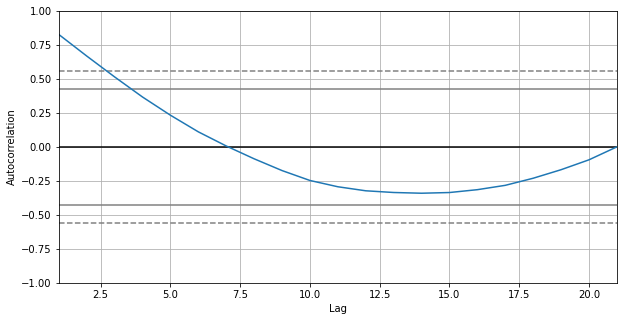

In [227]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(datewise["Confirmed"])

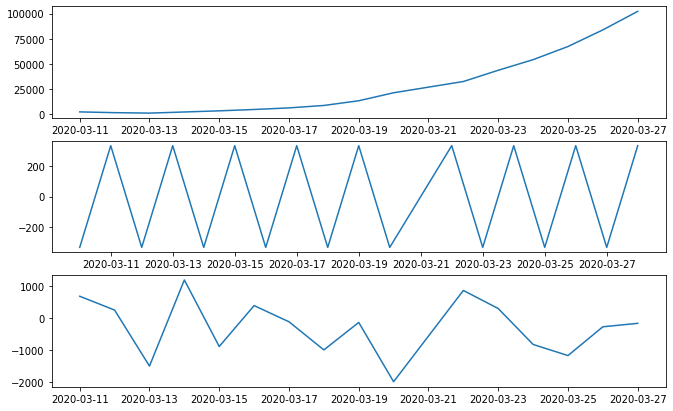

In [228]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(11,7))
import statsmodels.api as sm
results=sm.tsa.seasonal_decompose(model_train["Confirmed"], freq=2)
ax1.plot(results.trend)
ax2.plot(results.seasonal)
ax3.plot(results.resid)

In [229]:
print("Results of Dickey-Fuller test for Original Time Series")
dftest = adfuller(model_train["Confirmed"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller test for Original Time Series
Test Statistic                 8.098213
p-value                        1.000000
#Lags Used                     0.000000
Number of Observations Used   17.000000
Critical Value (1%)           -3.889266
Critical Value (5%)           -3.054358
Critical Value (10%)          -2.666984
dtype: float64


In [0]:
log_series=np.log(model_train["Confirmed"])

In [231]:
print("Results of Dickey-Fuller test for Log Transformed Time-Series")
dftest = adfuller((log_series.diff().diff()).dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
stationary=(log_series.diff().diff()).dropna()

Results of Dickey-Fuller test for Log Transformed Time-Series
Test Statistic                -1.636564
p-value                        0.464057
#Lags Used                     6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


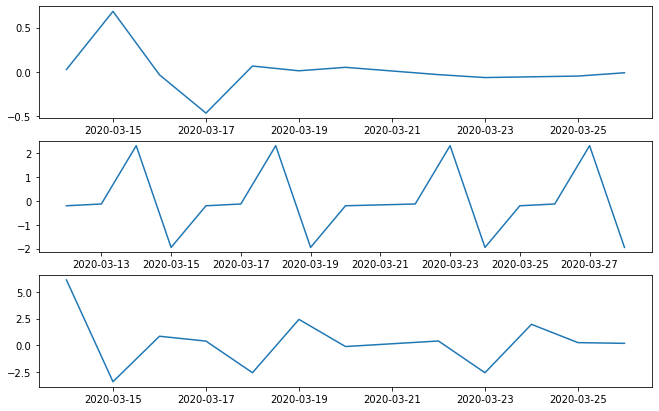

In [232]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(11,7))
import statsmodels.api as sm
results=sm.tsa.seasonal_decompose(stationary, freq=4)
ax1.plot(results.trend)
ax2.plot(results.seasonal)
ax3.plot(results.resid)

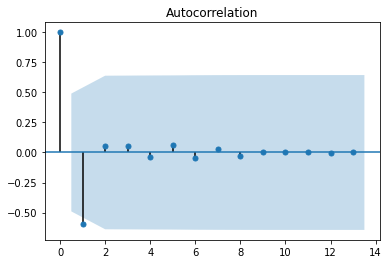

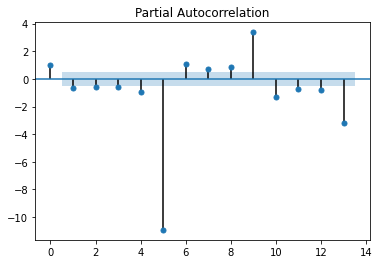

In [233]:
plot_acf(stationary)
plt.show()
plot_pacf(stationary)
plt.show()

### Facebook's Prophet Model for forecasting 

In [0]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [235]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [0]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [0]:
confirmed_forecast=prophet_c.predict(forecast_c)
#print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

In [238]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  23111.44341155302


Figure(720x432)


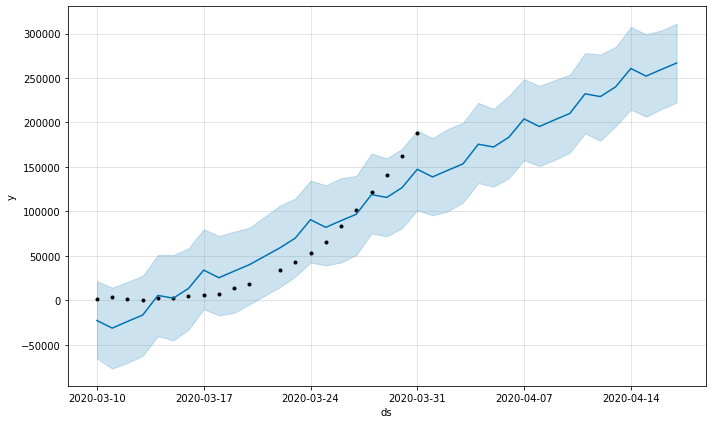

In [239]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


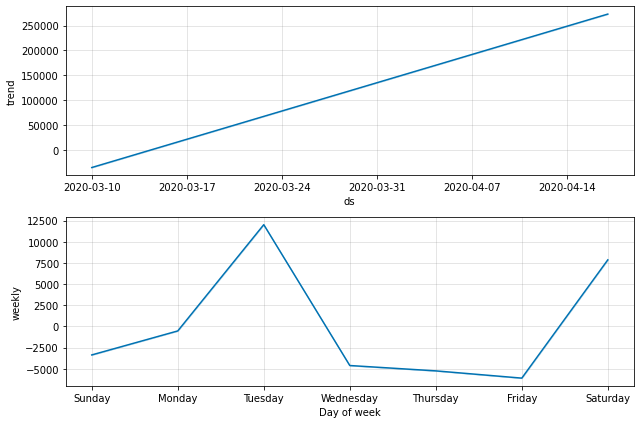

In [240]:
print(prophet_c.plot_components(confirmed_forecast))

#### Summarization of Forecasts using different Models

In [241]:
model_names=["Linear Regression","Support Vector Machine Regressor","Holt's Linear","Holt's Winter Model",
            "Facebook's Prophet Model"]
pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])

Model Name  Root Mean Squared Error
3               Holt's Winter Model              4765.531010
4          Facebook's Prophet Model             23111.443412
2                     Holt's Linear             47611.166130
0                 Linear Regression             66836.118855
1  Support Vector Machine Regressor             67476.893504

In [242]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

Dates  ...  Prophet's Upper Bound
0 2020-04-01  ...          182240.593706
1 2020-04-02  ...          192705.088089
2 2020-04-03  ...          199655.370456
3 2020-04-04  ...          222100.817461
4 2020-04-05  ...          215235.712987

[5 rows x 7 columns]

COVID-19 doesn't have very high mortatlity rate as we can see which is the most positive take away. Also the healthily growing Recovery Rate implies the disease is cureable. The only matter of concern is the exponential growth rate of infection. 

Countries like Italy and Korea are facing some serious trouble in containing the disease showing how deadly the neglegence can lead to. The need of the hour is to perform COVID-19 pendemic controlling practices like Testing, Contact Tracing and Quarantine with a speed greater than the speed of disease spread at each country level.

### Will be updating the notebook with new Data Visualization Plot and new Prediction and Forecasting Models. Please upvote the kernel if you have liked the work. Also, any kind of suggestion and corrections would be highly appreciated!

## Stay Safe and follow Social -Distancing Practices!!